In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams["figure.figsize"] = (20,12)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
model = LinearRegression()

In [2]:
df=pd.read_csv('Bengaluru_house_data.csv')

In [3]:
df.head(2)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00


## Data Cleaning



In [4]:
df.shape

(13320, 9)

In [5]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


Now lets drop some columns which do not contribute to our model

In [7]:
df['location'].unique() 

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [8]:
df['society'].unique() 

array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
      dtype=object)

In [9]:
df.drop(['availability', 'society', 'balcony'], axis = 'columns', inplace =True)

In [10]:
df.head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00


In [11]:
df['bath'] = pd.to_numeric(df['bath'])


In [12]:
df['bath'].dtype

dtype('float64')

In [13]:
df['bath'].isnull().sum()

73

In [14]:
df['size_bhk'] = df['size'].str[:2]

In [15]:
df['price'] = df['price']*100000

In [16]:
df.head()

,area_type,location,size,total_sqft,bath,price,size_bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,3907000.0,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,12000000.0,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,6200000.0,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,9500000.0,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,5100000.0,2


In [17]:
df['size_bhk'].unique()

array(['2 ', '4 ', '3 ', '6 ', '1 ', '8 ', '7 ', '5 ', '11', '9 ', nan,
       '27', '10', '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [18]:
df.dropna()

,area_type,location,size,total_sqft,bath,price,size_bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,3907000.0,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,12000000.0,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,6200000.0,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,9500000.0,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,5100000.0,2
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,23100000.0,5
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,40000000.0,4
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,6000000.0,2
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,48800000.0,4


In [19]:
df.isnull().sum()
df = df.dropna()

In [20]:
df.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
size_bhk      0
dtype: int64

In [21]:
df['size_bhk'] = df['size_bhk'].str.replace(' ', '')

In [22]:
df['size_bhk'].unique()
df['size_bhk'] = pd.to_numeric(df['size_bhk'])


In [23]:
df.drop(['size'], axis = 'columns', inplace =True)

In [24]:
df.bath.unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

In [25]:
df[df.bath>10]


,area_type,location,total_sqft,bath,price,size_bhk
938,Plot Area,5th Phase JP Nagar,1260,11.0,29000000.0,9
1078,Plot Area,BTM 1st Stage,3300,14.0,50000000.0,9
1718,Super built-up Area,2Electronic City Phase II,8000,27.0,23000000.0,27
1768,Plot Area,1 Ramamurthy Nagar,1200,11.0,17000000.0,11
1953,Plot Area,KR Puram,1200,12.0,11000000.0,8
1979,Plot Area,Hongasandra,990,12.0,12000000.0,8
3096,Super built-up Area,Jp nagar 8th Phase .,12000,12.0,52500000.0,10
3379,Super built-up Area,1Hanuman Nagar,2000,16.0,49000000.0,19
3609,Super built-up Area,Koramangala Industrial Layout,10000,16.0,55000000.0,16
4684,Plot Area,Munnekollal,2400,40.0,66000000.0,43


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13246 non-null  object 
 1   location    13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
 5   size_bhk    13246 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 724.4+ KB


In [27]:
df2 = df.copy()

In [28]:
df2.head()

,area_type,location,total_sqft,bath,price,size_bhk
0,Super built-up Area,Electronic City Phase II,1056,2.0,3907000.0,2
1,Plot Area,Chikka Tirupathi,2600,5.0,12000000.0,4
2,Built-up Area,Uttarahalli,1440,2.0,6200000.0,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,9500000.0,3
4,Super built-up Area,Kothanur,1200,2.0,5100000.0,2


In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13246 non-null  object 
 1   location    13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
 5   size_bhk    13246 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 724.4+ KB


In [30]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [31]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
        

In [32]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,area_type,location,total_sqft,bath,price,size_bhk
30,Super built-up Area,Yelahanka,2100 - 2850,4.0,18600000.0,4
122,Super built-up Area,Hebbal,3067 - 8156,4.0,47700000.0,4
137,Super built-up Area,8th Phase JP Nagar,1042 - 1105,2.0,5400500.0,2
165,Super built-up Area,Sarjapur,1145 - 1340,2.0,4349000.0,2
188,Super built-up Area,KR Puram,1015 - 1540,2.0,5680000.0,2
410,Super built-up Area,Kengeri,34.46Sq. Meter,1.0,1850000.0,1
549,Super built-up Area,Hennur Road,1195 - 1440,2.0,6377000.0,2
648,Built-up Area,Arekere,4125Perch,9.0,26500000.0,9
661,Super built-up Area,Yelahanka,1120 - 1145,2.0,4813000.0,2
672,Built-up Area,Bettahalsoor,3090 - 5002,4.0,44500000.0,4


In [33]:
def convert_avg(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [34]:
convert_avg('1270-1272')

1271.0

In [35]:
df2['total_sqft'] = df2['total_sqft'].apply(convert_avg)

In [36]:
df2.loc[122]

area_type     Super built-up  Area
location                    Hebbal
total_sqft                  5611.5
bath                           4.0
price                   47700000.0
size_bhk                         4
Name: 122, dtype: object

In [37]:

df2['price_per_sqft'] = (df2['price']/df2['total_sqft'])
df2.head(2)

,area_type,location,total_sqft,bath,price,size_bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,3907000.0,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,12000000.0,4,4615.384615


In [38]:
df2['price_per_sqft'] = df2['price_per_sqft'].apply(np.ceil)

In [39]:
df2.head()

,area_type,location,total_sqft,bath,price,size_bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,3907000.0,2,3700.0
1,Plot Area,Chikka Tirupathi,2600.0,5.0,12000000.0,4,4616.0
2,Built-up Area,Uttarahalli,1440.0,2.0,6200000.0,3,4306.0
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,9500000.0,3,6246.0
4,Super built-up Area,Kothanur,1200.0,2.0,5100000.0,2,4250.0


In [40]:
df2.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [41]:
len(df2.area_type.unique())

4

In [42]:


#area_stats = df2.groupby('area_type')['area_type'].agg('count')

#area_stats

<AxesSubplot:xlabel='price', ylabel='total_sqft'>

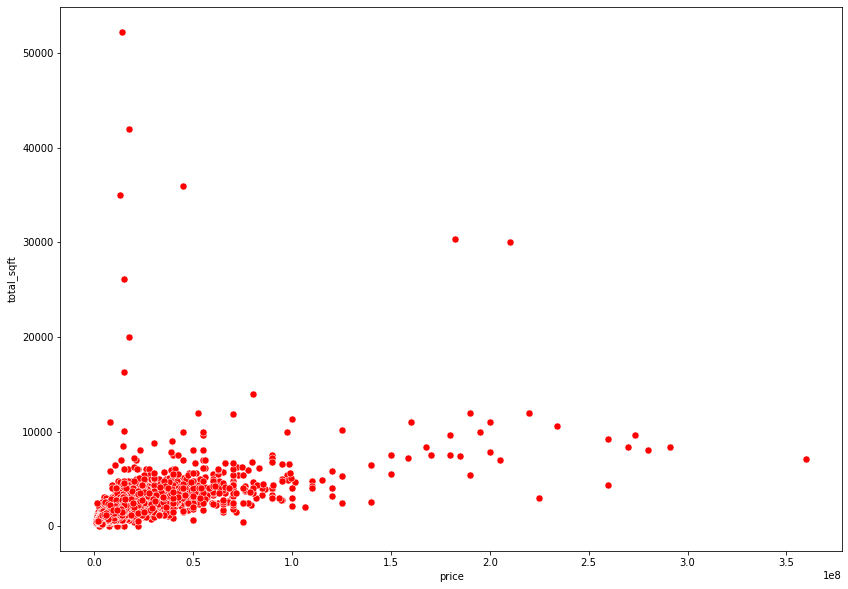

In [43]:
plt.figure(figsize=(14,10))
sns.scatterplot(x='price', y= 'total_sqft', data = df2, color = 'red', s= 50)

In [44]:
Q1 = df2.price_per_sqft.quantile(0.25)
Q3 = df2.price_per_sqft.quantile(0.75)
Q1, Q3

(4268.0, 7318.0)

In [45]:
IQR = Q3 - Q1
IQR

3050.0

In [46]:
lower_limit = (Q1 - (1.5*IQR))
upper_limit = (Q3 + (1.5*IQR))
lower_limit,upper_limit

(-307.0, 11893.0)

In [47]:

#df2[(df2.price_per_sqft < lower_limit) | (df2.price_per_sqft > upper_limit) ]



In [48]:
df2.shape

(13246, 7)

In [49]:
alt = df2[df2.price_per_sqft > upper_limit]
alt 

#alt1 = alt.groupby('area_type')['area_type'].agg('count')
#alt1



,area_type,location,total_sqft,bath,price,size_bhk,price_per_sqft
7,Super built-up Area,Rajaji Nagar,3300.0,4.0,60000000.0,4,18182.0
9,Plot Area,Gandhi Bazar,1020.0,6.0,37000000.0,6,36275.0
22,Plot Area,Thanisandra,2800.0,5.0,38000000.0,4,13572.0
45,Plot Area,HSR Layout,600.0,9.0,20000000.0,8,33334.0
48,Plot Area,KR Puram,800.0,1.0,13000000.0,2,16250.0
...,...,...,...,...,...,...,...
13262,Built-up Area,Abshot Layout,1140.0,1.0,18500000.0,2,16229.0
13277,Plot Area,Kundalahalli Colony,1400.0,7.0,21800000.0,7,15572.0
13305,Carpet Area,Hulimavu,500.0,1.0,22000000.0,1,44000.0
13306,Plot Area,Rajarajeshwari Nagara,1200.0,5.0,32500000.0,4,27084.0


In [50]:
df2.describe()

,total_sqft,bath,price,size_bhk,price_per_sqft
count,13200.000000,13246.000000,1.324600e+04,13246.000000,1.320000e+04
mean,1555.302783,2.692586,1.123894e+07,2.801902,7.921189e+03
std,1237.323445,1.341506,1.490766e+07,1.295758,1.067272e+05
min,1.000000,1.000000,8.000000e+05,1.000000,2.680000e+02
25%,1100.000000,2.000000,5.000000e+06,2.000000,4.268000e+03
50%,1275.000000,2.000000,7.200000e+06,3.000000,5.439000e+03
75%,1672.000000,3.000000,1.200000e+07,3.000000,7.318000e+03
max,52272.000000,40.000000,3.600000e+08,43.000000,1.200000e+07


###### After deleting Outliers

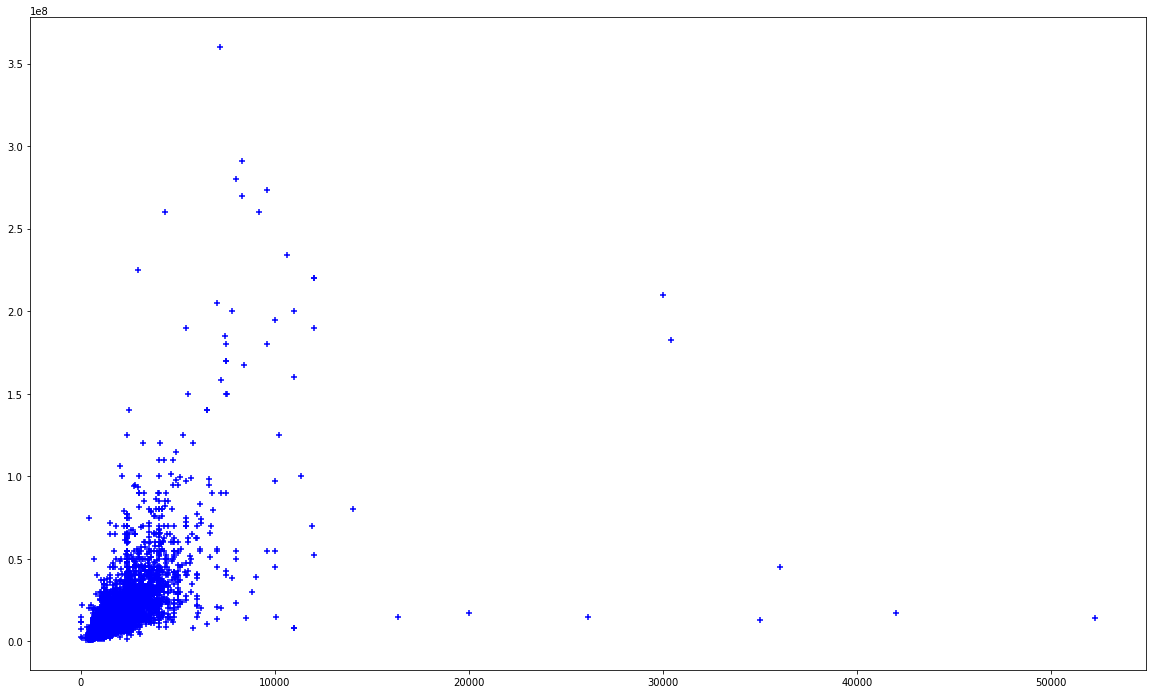

In [51]:
plt.scatter(df2.total_sqft, df2.price, color = 'blue', marker = '+')

In [52]:
df2 = df2.drop(['area_type'], axis = 'columns')

In [53]:
df2.head()

,location,total_sqft,bath,price,size_bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,3907000.0,2,3700.0
1,Chikka Tirupathi,2600.0,5.0,12000000.0,4,4616.0
2,Uttarahalli,1440.0,2.0,6200000.0,3,4306.0
3,Lingadheeranahalli,1521.0,3.0,9500000.0,3,6246.0
4,Kothanur,1200.0,2.0,5100000.0,2,4250.0


In [54]:
df2.describe()

,total_sqft,bath,price,size_bhk,price_per_sqft
count,13200.000000,13246.000000,1.324600e+04,13246.000000,1.320000e+04
mean,1555.302783,2.692586,1.123894e+07,2.801902,7.921189e+03
std,1237.323445,1.341506,1.490766e+07,1.295758,1.067272e+05
min,1.000000,1.000000,8.000000e+05,1.000000,2.680000e+02
25%,1100.000000,2.000000,5.000000e+06,2.000000,4.268000e+03
50%,1275.000000,2.000000,7.200000e+06,3.000000,5.439000e+03
75%,1672.000000,3.000000,1.200000e+07,3.000000,7.318000e+03
max,52272.000000,40.000000,3.600000e+08,43.000000,1.200000e+07


In [55]:
df2.head()

,location,total_sqft,bath,price,size_bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,3907000.0,2,3700.0
1,Chikka Tirupathi,2600.0,5.0,12000000.0,4,4616.0
2,Uttarahalli,1440.0,2.0,6200000.0,3,4306.0
3,Lingadheeranahalli,1521.0,3.0,9500000.0,3,6246.0
4,Kothanur,1200.0,2.0,5100000.0,2,4250.0


In [56]:
df2.location.value_counts()

Whitefield                         534
Sarjapur  Road                     392
Electronic City                    302
Kanakpura Road                     266
Thanisandra                        233
                                  ... 
Sadhguru Layout                      1
Wheelers Road                        1
Nagarbhavi Garden Villas Layout      1
Banashankari 6th Stage               1
Kengeri Satellite Town Stage II      1
Name: location, Length: 1304, dtype: int64

In [57]:
df2.shape

(13246, 6)

In [58]:
df2[df2['bath']> df2['size_bhk']+2]

,location,total_sqft,bath,price,size_bhk,price_per_sqft
1078,BTM 1st Stage,3300.0,14.0,50000000.0,9,15152.0
1953,KR Puram,1200.0,12.0,11000000.0,8,9167.0
1979,Hongasandra,990.0,12.0,12000000.0,8,12122.0
2620,Sathya Sai Layout,11338.0,9.0,100000000.0,6,8820.0
6838,Rajaji Nagar,7500.0,8.0,170000000.0,5,22667.0
6937,5th Block Hbr Layout,2600.0,12.0,67500000.0,9,25962.0
7709,Chikkabanavar,2460.0,7.0,8000000.0,4,3253.0
8106,Wilson Garden,1850.0,12.0,30000000.0,8,16217.0
9974,Sector 1 HSR Layout,2400.0,6.0,77500000.0,3,32292.0
9990,Doddakannelli,1200.0,9.0,12200000.0,6,10167.0


In [59]:
df3 = df2.drop(df2[df2['bath']> df2['size_bhk']+2].index)

In [60]:
df3.tail()

,location,total_sqft,bath,price,size_bhk,price_per_sqft
13315,Whitefield,3453.0,4.0,23100000.0,5,6690.0
13316,Richards Town,3600.0,5.0,40000000.0,4,11112.0
13317,Raja Rajeshwari Nagar,1141.0,2.0,6000000.0,2,5259.0
13318,Padmanabhanagar,4689.0,4.0,48800000.0,4,10408.0
13319,Doddathoguru,550.0,1.0,1700000.0,1,3091.0


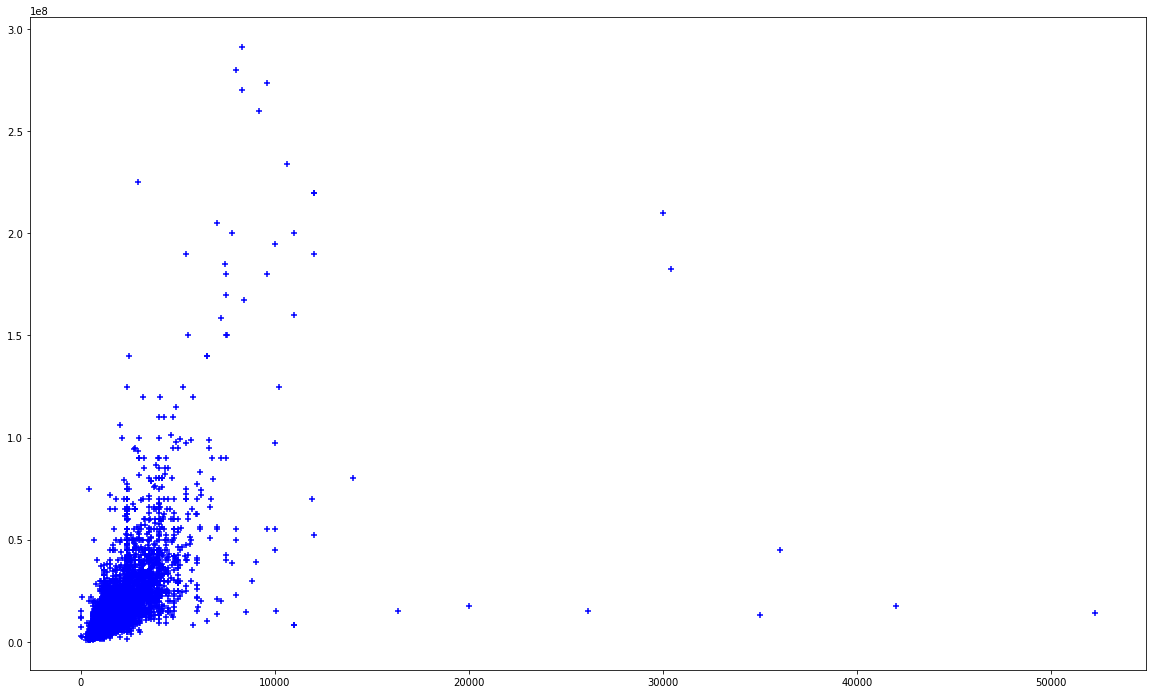

In [61]:
plt.scatter(df3.total_sqft, df3.price, color = 'blue', marker = '+')

In [62]:
loc = df3.location.value_counts()
loc[loc<=12].count()
location_lessthan_12 = loc[loc<=12]
df3.location = df3.location.apply(lambda x: 'other' if x in location_lessthan_12 else x)
df3.shape

(13230, 6)

In [63]:
df3.location.value_counts()

other                     3211
Whitefield                 534
Sarjapur  Road             392
Electronic City            301
Kanakpura Road             266
                          ... 
Gollarapalya Hosahalli      13
Bommenahalli                13
Neeladri Nagar              13
ISRO Layout                 13
Rajiv Nagar                 13
Name: location, Length: 214, dtype: int64

In [64]:
len(df3.location.value_counts()< 10)

214

In [65]:
df3.head()
df3.shape

(13230, 6)

In [66]:
def normally_dist(df3):
    df_out = pd.DataFrame()
    for key, subdf in df3.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        red_df = subdf[(subdf.price_per_sqft>(m-st)) &(subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,red_df],ignore_index = True)
    return df_out
df4 = normally_dist(df3)
df4.shape

(11514, 6)

In [67]:
df4.head()

,location,total_sqft,bath,price,size_bhk,price_per_sqft
0,Devarachikkanahalli,1250.0,2.0,4400000.0,3,3520.0
1,Devarachikkanahalli,1250.0,2.0,4000000.0,2,3200.0
2,Devarachikkanahalli,1200.0,2.0,8300000.0,2,6917.0
3,Devarachikkanahalli,1170.0,2.0,4000000.0,2,3419.0
4,Devarachikkanahalli,1425.0,2.0,6500000.0,3,4562.0


In [68]:
df4.location.value_counts()

other                   3184
Whitefield               529
Sarjapur  Road           391
Electronic City          284
Kanakpura Road           194
                        ... 
Nagavarapalya              8
Dasarahalli                8
NGR Layout                 8
Vishveshwarya Layout       7
Mahalakshmi Layout         6
Name: location, Length: 214, dtype: int64

In [69]:
df4.to_csv("C:/Users/ancha/OneDrive/Desktop/vs_code/Benga.csv")

In [70]:
hp = pd.read_csv("C:/Users/ancha/OneDrive/Desktop/vs_code/benga.csv", index_col =0)

In [71]:
hp.head()

,location,total_sqft,bath,price,size_bhk,price_per_sqft
0,Devarachikkanahalli,1250.0,2.0,4400000.0,3,3520.0
1,Devarachikkanahalli,1250.0,2.0,4000000.0,2,3200.0
2,Devarachikkanahalli,1200.0,2.0,8300000.0,2,6917.0
3,Devarachikkanahalli,1170.0,2.0,4000000.0,2,3419.0
4,Devarachikkanahalli,1425.0,2.0,6500000.0,3,4562.0


In [72]:
hp.T

,0,1,2,3,4,5,6,7,8,9,...,11504,11505,11506,11507,11508,11509,11510,11511,11512,11513
location,Devarachikkanahalli,Devarachikkanahalli,Devarachikkanahalli,Devarachikkanahalli,Devarachikkanahalli,Devarachikkanahalli,Devarachikkanahalli,Devarachikkanahalli,Devarachikkanahalli,Devarachikkanahalli,...,other,other,other,other,other,other,other,other,other,other
total_sqft,1250.0,1250.0,1200.0,1170.0,1425.0,947.0,1130.0,1417.0,1230.0,1705.0,...,1400.0,1256.0,1200.0,1353.0,812.0,1440.0,1200.0,1075.0,1200.0,3600.0
bath,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,...,7.0,2.0,5.0,2.0,1.0,2.0,2.0,2.0,5.0,5.0
price,4400000.0,4000000.0,8300000.0,4000000.0,6500000.0,4300000.0,3600000.0,7600000.0,5800000.0,7500000.0,...,21800000.0,6500000.0,13000000.0,11000000.0,2600000.0,6393000.0,14000000.0,4800000.0,32500000.0,40000000.0
size_bhk,3,2,2,2,3,2,2,3,2,3,...,7,2,6,2,1,3,2,2,4,4
price_per_sqft,3520.0,3200.0,6917.0,3419.0,4562.0,4541.0,3186.0,5364.0,4716.0,4399.0,...,15572.0,5176.0,10834.0,8131.0,3202.0,4440.0,11667.0,4466.0,27084.0,11112.0


In [73]:
dummies_hp = pd.get_dummies(hp.location)
hp1 = pd.concat([hp,dummies_hp ], axis = 'columns')

In [84]:
hp1

,total_sqft,bath,price,size_bhk,price_per_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1250.0,2.0,4400000.0,3,3520.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1250.0,2.0,4000000.0,2,3200.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,8300000.0,2,6917.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,4000000.0,2,3419.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,6500000.0,3,4562.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11509,1440.0,2.0,6393000.0,3,4440.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11510,1200.0,2.0,14000000.0,2,11667.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11511,1075.0,2.0,4800000.0,2,4466.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11512,1200.0,5.0,32500000.0,4,27084.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [75]:
hp1 = hp1.drop(columns = ['location'])

In [76]:
hp1.shape

(11514, 219)

In [77]:
hp1.head()

,total_sqft,bath,price,size_bhk,price_per_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1250.0,2.0,4400000.0,3,3520.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1250.0,2.0,4000000.0,2,3200.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,8300000.0,2,6917.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,4000000.0,2,3419.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,6500000.0,3,4562.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
x = hp1.drop(columns = ['price','Vittasandra'])


In [79]:
x.head()


,total_sqft,bath,size_bhk,price_per_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1250.0,2.0,3,3520.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1250.0,2.0,2,3200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2,6917.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2,3419.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,3,4562.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
y = hp1.price
len(y)
y.head()

0    4400000.0
1    4000000.0
2    8300000.0
3    4000000.0
4    6500000.0
Name: price, dtype: float64

In [106]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [107]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
reg.score(x_test,y_test)

0.8121099060292915

In [126]:
def predict_p(location,total_sqft,bath,size_bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    s = np.zeros(len(x.columns))
    s[0] = total_sqft
    s[1] = bath
    s[2] = size_bhk
    if loc_index >= 0:
        s[loc_index] = 1

    return reg.predict([s])[0]